# Topic Modeling with LDA

Latent Dirichlet Allocation (LDA) è un metodo di apprendimento non supervisionato (unsupervised). In termini semplici, ciò significa che LDA non richiede etichette o annotazioni per i dati di input durante il processo di addestramento.

## Caratteristiche di LDA come metodo non supervisionato:
- Scoperta di Temi Latenti:
LDA cerca di scoprire temi latenti (argomenti) all'interno di un insieme di documenti senza sapere in anticipo quali siano questi temi. Non c'è bisogno di fornire esempi di quali parole appartengono a quali argomenti.

- Distribuzione delle Parole e dei Documenti:
LDA assume che i documenti siano generati da una miscela di argomenti, dove ogni argomento è una distribuzione di parole. Il modello cerca di inferire queste distribuzioni direttamente dai dati.

- Inferenza Bayesiana:
Utilizza tecniche di inferenza bayesiana per stimare le distribuzioni degli argomenti e delle parole. Questo processo è guidato dai dati stessi piuttosto che da etichette predefinite.

## Vantaggi di un Metodo Non Supervisionato come LDA:
- Nessun Bisogno di Annotazione Manuale:
Non è necessario etichettare manualmente i dati, il che può essere un compito dispendioso in termini di tempo e risorse, specialmente per grandi collezioni di testi.

- Scoperta Automatica di Strutture:
LDA può trovare strutture e pattern nei dati che potrebbero non essere evidenti o che non erano stati precedentemente considerati.

## Confronto con Metodi Supervisionati:
- Metodi Supervisionati:
Richiedono dati etichettati per addestrare un modello. Ad esempio, un classificatore di sentimenti potrebbe essere addestrato su un insieme di recensioni etichettate come "positive" o "negative".

- Metodi Non Supervisionati:
Come LDA, lavorano senza etichette predefinite. Sono usati per scoprire pattern nascosti nei dati, come argomenti nei documenti, cluster in insiemi di dati, ecc.

## Esempio di Applicazione:
Supponiamo di avere un insieme di articoli di giornale. Utilizzando LDA, possiamo scoprire automaticamente che ci sono argomenti come politica, sport, economia, ecc., senza bisogno di etichettare manualmente gli articoli. LDA raggrupperà le parole e i documenti in base alla co-occorrenza delle parole nei testi, permettendoci di capire meglio i temi principali trattati negli articoli.

In sintesi, LDA è un potente strumento di analisi non supervisionata che permette di esplorare e comprendere grandi collezioni di testi senza necessità di etichettature manuali.

### Funzionamento:

Step 1: Ogni documento è associato a una distribuzione di argomenti (θ). Questa distribuzione viene estratta da una distribuzione Dirichlet.
Step 2: Ogni argomento è una distribuzione di parole (β), anch'essa estratta da una distribuzione Dirichlet.
Step 3: Per ogni parola in un documento, si sceglie un argomento secondo la distribuzione θ del documento.
Step 4: Data la scelta dell'argomento, si sceglie una parola da quella distribuzione di parole β dell'argomento scelto.

### Inferenza:

Dato un insieme di documenti, l'obiettivo è risalire a θ e β, ossia determinare quali argomenti sono presenti e quali parole sono associate a ciascun argomento.

### Stima:

LDA utilizza tecniche di stima come Gibbs Sampling o Variational Bayes per inferire le distribuzioni degli argomenti nei documenti e le distribuzioni delle parole negli argomenti.

In [4]:
doc_term_matrix = 'dataframe of text'
#Impostazione del Numero di Argomenti:
num_topics = 5
#Creazione del Modello LDA:
from sklearn.decomposition import LatentDirichletAllocation
lda_topic_model = LatentDirichletAllocation(n_components=num_topics, random_state=667)

#Addestramento del Modello:
#doc_topic_matrix = lda_topic_model.fit_transform(doc_term_matrix)

Addestri il modello sulla matrice termine-documento (doc_term_matrix). Questo produce una matrice in cui ogni riga rappresenta un documento e ogni colonna rappresenta la probabilità che il documento appartenga a ciascun argomento.

Creazione di un dataframe per visualizzare le assegnazioni degli argomenti ai documenti, con colonne etichettate come 'Topic 1', 'Topic 2', ecc.Questo processo permette di analizzare e capire meglio le tematiche trattate in un insieme di documenti, facilitando l'esplorazione di grandi collezioni di testi.

In [5]:
# col_names = [f'Topic {x}' for x in range(1, num_topics + 1)]
# doc_topic_df = pd.DataFrame(doc_topic_matrix, columns=col_names)

## Load BBC Data

In [6]:
import pandas as pd

bbc_data = pd.read_csv("bbc_data.csv")
bbc_data

,data,labels
0,Musicians to tackle US red tape Musicians gro...,entertainment
1,"U2s desire to be number one U2, who have won ...",entertainment
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment
3,Snicket tops US box office chart The film ada...,entertainment
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment
...,...,...
2220,Warning over Windows Word files Writing a Mic...,tech
2221,Fast lifts rise into record books Two high-sp...,tech
2222,Nintendo adds media playing to DS Nintendo is...,tech
2223,Fast moving phone viruses appear Security fir...,tech


## Tokenize and TF-IDF 

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Remove stop words and constrain the dimensionality by requiring a term to show up 
# in at least 5 documents and less than 75% of all documents
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', min_df = 5, max_df = 0.75)

# Tokenize and perform the mighty TF-IDF calculation
doc_term_matrix = tfidf_vectorizer.fit_transform(bbc_data['data'])

# Check out the dimensions
print(f'Rows: {doc_term_matrix.shape[0]}, Columns: {doc_term_matrix.shape[1]}')

Rows: 2225, Columns: 9323


## Topic Modeling With LDA

In [9]:
from sklearn.decomposition import LatentDirichletAllocation

# Learn X topics from the text documents
num_topics = 5

lda_topic_model = LatentDirichletAllocation(n_components = num_topics, random_state = 12345)

# Train the LDA model and get the document topic assignments
doc_topic_matrix = lda_topic_model.fit_transform(doc_term_matrix)

# I like pandas DataFrames
col_names = [f'Topic {x}' for x in range(1, num_topics + 1)]

# Display each document's topic assignments
doc_topic_df = pd.DataFrame(doc_topic_matrix, columns = col_names)
doc_topic_df

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
0,0.908332,0.019527,0.020315,0.019525,0.032301
1,0.595400,0.012971,0.365403,0.012981,0.013246
2,0.881240,0.020139,0.058059,0.020141,0.020420
3,0.805237,0.022365,0.127504,0.022362,0.022532
4,0.666655,0.020389,0.271930,0.020401,0.020626
...,...,...,...,...,...
2220,0.363406,0.019718,0.576899,0.019717,0.020259
2221,0.243209,0.027099,0.673431,0.027094,0.029167
2222,0.024999,0.024227,0.901682,0.024226,0.024865
2223,0.021422,0.020904,0.915623,0.020903,0.021148


## Top Words By Topic

In [10]:
# Display the top X words for each topic
num_words = 10

for topic, words in enumerate(lda_topic_model.components_):
    word_total = words.sum()              # Get the total word weight for topic
    sorted_words = words.argsort()[::-1]  # Sort in descending order
    print(f'\nTopic {topic + 1:02d}')     # Print the topic
    for i in range(0, num_words):         # Print topic's top 10 words
        word = tfidf_vectorizer.get_feature_names_out()[sorted_words[i]]
        word_weight = words[sorted_words[i]] 
        print(f'  {word} ({word_weight:.3f})')


Topic 01
  mr (48.868)
  film (32.786)
  best (27.183)
  year (25.571)
  new (24.757)
  world (23.683)
  time (23.647)
  election (23.512)
  game (23.211)
  people (23.025)

Topic 02
  blog (3.642)
  blogs (3.146)
  tindall (1.714)
  journals (1.182)
  blogger (1.042)
  blogging (0.864)
  spaces (0.729)
  lewsey (0.676)
  technorati (0.640)
  wembley (0.576)

Topic 03
  music (21.694)
  mobile (18.917)
  people (16.674)
  technology (15.342)
  users (14.424)
  digital (14.258)
  software (13.051)
  phone (12.447)
  net (11.816)
  online (11.519)

Topic 04
  seed (7.257)
  roddick (5.490)
  open (4.951)
  australian (4.751)
  federer (4.469)
  benitez (4.010)
  tennis (3.966)
  hewitt (3.699)
  henman (3.681)
  davenport (3.580)

Topic 05
  economy (17.891)
  growth (17.864)
  market (14.885)
  economic (14.513)
  oil (14.462)
  bank (14.369)
  sales (13.988)
  shares (13.856)
  year (12.860)
  company (12.374)


## Perplexity by Topic Count

a perplessità (perplexity) è una misura comunemente utilizzata per valutare i modelli di argomenti come Latent Dirichlet Allocation (LDA). Essa quantifica quanto bene il modello probabilistico predice una raccolta di dati. Più precisamente, la perplessità misura l'incertezza nel modello: un valore di perplessità più basso indica un modello migliore, in quanto suggerisce che il modello è più in grado di spiegare i dati.

Dettagli della Perplessità
In termini di LDA, la perplessità è una funzione della probabilità logaritmica per parola e viene calcolata come segue:


La perplessità ($($text{perplexity}$)) è definita come:

\[ \text{perplessità}(D) = \exp \left( -\frac{\sum_{d \in D} \log P(w_d)}{\sum_{d \in D} N_d} \right) \]

Dove:

- \(D\) è l'insieme dei documenti.
- \(w_d\) è il vettore delle parole nel documento \(d\).
- \(P(w_d)\) è la probabilità del documento \(d\) secondo il modello.
- \(N_d\) è il numero di parole nel documento \(d\).

In pratica, la perplessità valuta quanto bene il modello LDA predice le parole nei documenti del set di dati. Un valore di perplessità più basso indica una maggiore capacità del modello di predire correttamente i dati di input.

In [12]:
perplexity = []
topic_nums = range(2, 11)

# Calulcate the perplexity metric over multiple topic counts
for topics in topic_nums:
    lda = LatentDirichletAllocation(n_components = topics, random_state = 12345)
    lda.fit(doc_topic_matrix)
    
    perplexity.append(lda.perplexity(doc_topic_matrix))

## Visualize the Perplexity Scores

Text(0, 0.5, 'Perplexity')

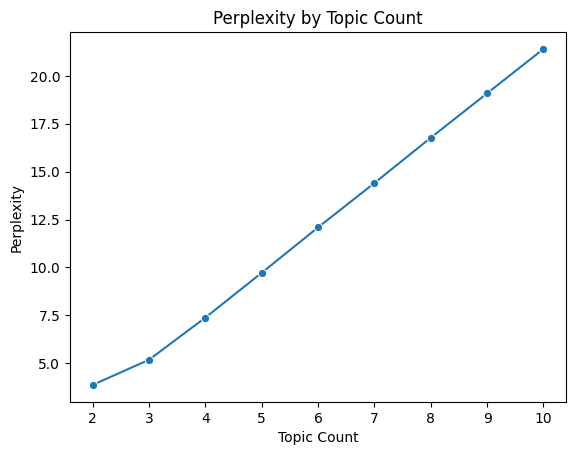

In [13]:
import seaborn as sns

# Plot perplexity by topic count
ax = sns.lineplot(x = topic_nums, y = perplexity, marker = 'o')

# Add labels
ax.set_title('Perplexity by Topic Count')
ax.set_xlabel('Topic Count')
ax.set_ylabel('Perplexity')

## Scelta del Numero Ottimale di Argomenti:
Utilizzando la perplessità, puoi scegliere un numero di argomenti che bilancia bene la capacità del modello di spiegare i dati senza sovra-adattamento. Un punto di "ginocchio" nella curva della perplessità è spesso una buona scelta.

In sintesi, la perplessità è una misura utile per valutare e ottimizzare i modelli di argomenti non supervisionati come LDA, aiutandoti a determinare il numero ottimale di argomenti per la tua collezione di documenti.